In [1]:
import pandas as pd
import matplotlib
import string

GOT= pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/GOT_house_csv.csv')

#Create GOT1, to avoid altering the original data
GOT1=GOT

print(GOT1.head())
print(GOT1.info())

  Release Date    Season    Episode     Episode Title          Name  \
0    4/17/2011  Season 1  Episode 1  Winter is Coming  waymar royce   
1    4/17/2011  Season 1  Episode 1  Winter is Coming          will   
2    4/17/2011  Season 1  Episode 1  Winter is Coming  waymar royce   
3    4/17/2011  Season 1  Episode 1  Winter is Coming          will   
4    4/17/2011  Season 1  Episode 1  Winter is Coming         gared   

                                            Sentence House  \
0  What do you expect? They're savages. One lot s...   NaN   
1  I've never seen wildlings do a thing like this...   NaN   
2                             How close did you get?   NaN   
3                            Close as any man would.   NaN   
4                   We should head back to the wall.   NaN   

                                     Sentences_Clean  Num_Words  
0   what do you expect they are savages one lot s...         27  
1   i have never seen wildlings do a thing like t...         23  
2 

In [2]:
!pip install nltk
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/kyle/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/kyle/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/kyle/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /Users/kyle/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/kyle/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/kyle/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]   

True

In [3]:
#list of contractions and the expanded mapping 
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [4]:
#define a function, expand_contractions, which takes a string and expands all contractions within the string using contraction_map
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    expanded = ''
    text = text.lower() #make all text lowercase
    wordList = text.split() #put text into a list of words
    for i in range(len(wordList)):
        if wordList[i] in contraction_mapping.keys(): #for each word, if it is a contraction in the listing
            expanded = expanded + ' ' + contraction_mapping[wordList[i]] #then replace with the expanded version
        else:
            expanded = expanded + ' ' + wordList[i] #otherwise, keep the original word
    return expanded

#define a function, remove_punctuation, which takes in a string and removes all punctuation 
def remove_punctuation(s):
    s = s.translate(str.maketrans('','',string.punctuation)) #take out punctuation in the sentence
    j = nltk.word_tokenize(s.lower()) #put each word in the sentence within a list, j
    return s

#define function, clean_sentences, which removes punctuation and expands all contractions in a sentence
def clean_sentences(text):
    return remove_punctuation(expand_contractions(text))
    

In [5]:
GOT1['Sentences_Clean'] = GOT1.Sentence.apply(lambda x:clean_sentences(x))
GOT1.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words
0,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,NaN,what do you expect they are savages one lot s...,27
1,4/17/2011,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,NaN,i have never seen wildlings do a thing like t...,23
2,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,NaN,how close did you get,5
3,4/17/2011,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,NaN,close as any man would,5
4,4/17/2011,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,NaN,we should head back to the wall,7


In [6]:
#define stopwords
stopword=nltk.corpus.stopwords.words('english')
stopword = stopword + ['l', 'k', 'would', 'us', 'one'] #add stopwords that we noticed were misspelled in the data 

#Define a function, remove_stopwords, which takes in a string and removes stop words
def remove_stopwords(sentence, stopwords = stopword):
    nostop = ''
    sentence = sentence.split()
    for i in range(len(sentence)):
        if sentence[i] not in stopwords: #for each word, if it is not a stopword
            nostop = nostop + ' ' + sentence[i] #then include it in the revised sentenced
    nostop = nostop.split()
    return nostop

In [7]:
#Implement the stop words function to a new column 
GOT1['Tokenized_No_Stop']=GOT1.Sentences_Clean.apply(lambda x:remove_stopwords(x))
GOT1.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_No_Stop
0,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,NaN,what do you expect they are savages one lot s...,27,"[expect, savages, lot, steals, goat, another, ..."
1,4/17/2011,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,NaN,i have never seen wildlings do a thing like t...,23,"[never, seen, wildlings, thing, like, never, s..."
2,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,NaN,how close did you get,5,"[close, get]"
3,4/17/2011,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,NaN,close as any man would,5,"[close, man]"
4,4/17/2011,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,NaN,we should head back to the wall,7,"[head, back, wall]"


In [8]:
#Calculate words per line, assuming contractions are all expanded
GOT1["Num_Words"] = GOT1.Sentences_Clean.apply(lambda x: len(x.split()))
GOT1.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_No_Stop
0,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,NaN,what do you expect they are savages one lot s...,27,"[expect, savages, lot, steals, goat, another, ..."
1,4/17/2011,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,NaN,i have never seen wildlings do a thing like t...,23,"[never, seen, wildlings, thing, like, never, s..."
2,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,NaN,how close did you get,5,"[close, get]"
3,4/17/2011,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,NaN,close as any man would,5,"[close, man]"
4,4/17/2011,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,NaN,we should head back to the wall,7,"[head, back, wall]"


In [9]:
#to find the characters with most words and define the top 10 characters in the show
import numpy as np
GOTData = pd.pivot_table(GOT1, values='Num_Words', index='Name', aggfunc=np.sum) #pivot number of words by character name

GOT_Top10 = GOTData.sort_values('Num_Words') #find characters with the most words said
GOT_Top10 = GOT_Top10.tail(10)

GOT_Top10 = pd.DataFrame(GOT_Top10.to_records()) #convert into a dataframe
GOT_Top10

,Name,Num_Words
0,arya stark,6795
1,sam tarly,6922
2,davos,7142
3,petyr baelish,7953
4,sansa stark,8514
5,jaime lannister,12316
6,daenerys targaryen,12715
7,jon snow,12915
8,cersei lannister,14940
9,tyrion lannister,26929


In [10]:
#to find each characters favourite word (i.e. most repeated word, not including stopwords)

#define a function, character_words, that appends all tokenized_no_stop words for a chosen character in the form of a list
def character_words(character):
    l = []
    for i in range(len(GOT1['Name'])):
        if character in GOT1['Name'][i]:
            l = l + GOT1['Tokenized_No_Stop'][i]
    return l

#define a function, most_freq, that takes a character and outputs the most common word said
def most_freq(s):
    wordlist = character_words(s) #get the list of words said for the character
    word_dict = {} #create dictionary to track count of unique words
    for i in wordlist:
        if i in word_dict.keys():
            word_dict[i] = word_dict[i] + 1
        else:
            word_dict[i] = 1
    freq = sorted(word_dict.items(), key=lambda x: x[1], reverse=True) #sort by value
    return freq[0][0]

In [11]:
GOT_Top10['Fave_Words'] = GOT_Top10.Name.apply(lambda x: most_freq(x)) #obtain favourite word for top 5 characters
GOT_Top10

,Name,Num_Words,Fave_Words
0,arya stark,6795,know
1,sam tarly,6922,know
2,davos,7142,grace
3,petyr baelish,7953,know
4,sansa stark,8514,lord
5,jaime lannister,12316,like
6,daenerys targaryen,12715,know
7,jon snow,12915,know
8,cersei lannister,14940,want
9,tyrion lannister,26929,know


Create wordclouds for top 5 characters, defined by characters who have the most words spoken in the series

In [12]:
Tyrion = ' '.join(character_words('tyrion'))
Cersei = ' '.join(character_words('cersei'))
Jon = ' '.join(character_words('jon snow'))
Daenerys = ' '.join(character_words('daenerys'))
Jaime = ' '.join(character_words('jaime'))

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

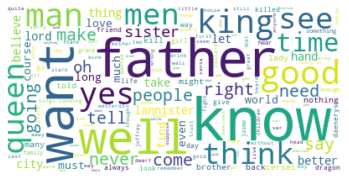

In [15]:
#Generate word cloud for Tyrion using the top 150 words

wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Tyrion)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

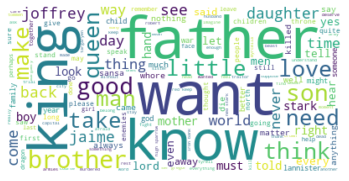

In [16]:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Cersei)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

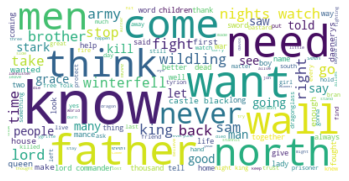

In [17]:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Jon)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

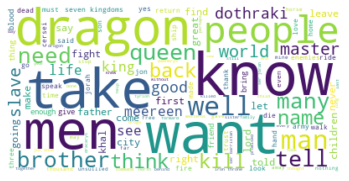

In [18]:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Daenerys)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

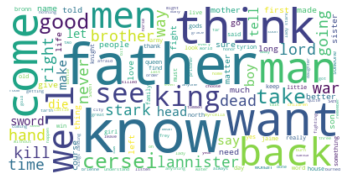

In [19]:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Jaime)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Create wordclouds for top 3 houses in the series, defined by the houses with the most words spoken.

In [20]:
GOT1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 10 columns):
Release Date         23911 non-null object
Season               23911 non-null object
Episode              23911 non-null object
Episode Title        23911 non-null object
Name                 23911 non-null object
Sentence             23911 non-null object
House                21639 non-null object
Sentences_Clean      23911 non-null object
Num_Words            23911 non-null int64
Tokenized_No_Stop    23911 non-null object
dtypes: int64(1), object(9)
memory usage: 1.8+ MB


In [21]:
#From the above, we can see that there are characters that do not belong in a house/ are not significant enough to have a house. As such, we can remove these lines.

GOTHouse = GOT1.dropna()
GOTHouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21639 entries, 15 to 23909
Data columns (total 10 columns):
Release Date         21639 non-null object
Season               21639 non-null object
Episode              21639 non-null object
Episode Title        21639 non-null object
Name                 21639 non-null object
Sentence             21639 non-null object
House                21639 non-null object
Sentences_Clean      21639 non-null object
Num_Words            21639 non-null int64
Tokenized_No_Stop    21639 non-null object
dtypes: int64(1), object(9)
memory usage: 1.8+ MB


In [22]:
GOTHouse

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_No_Stop
15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"[go, fathers, watching]"
16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,[mother]
17,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,"Fine work, as always. Well done.",House Stark,fine work as always well done,6,"[fine, work, always, well, done]"
18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,[thank]
19,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,I love the detail that you've managed to get i...,House Stark,i love the detail that you have managed to ge...,20,"[love, detail, managed, get, corners, …, quite..."
...,...,...,...,...,...,...,...,...,...,...
23905,5/19/2019,Season 8,Episode 6,The Iron Throne,bronn,"Well, I imagine he isn't using them properly.",House Bronn,well i imagine he is not using them properly,9,"[well, imagine, using, properly]"
23906,5/19/2019,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,House Tarth,i think we can all agree that ships take prec...,12,"[think, agree, ships, take, precedence, brothels]"
23907,5/19/2019,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,House Bronn,i think that is a very presumptuous statement,8,"[think, presumptuous, statement]"
23908,5/19/2019,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,House Lannister,i once brought a jackass and a honeycomb into...,11,"[brought, jackass, honeycomb, brothel]"


In [23]:
#from the data above, it looks like there are still houses defined as "0"
#filter these out to examine them further
GOT0 = GOTHouse[GOTHouse.House == '0']
GOT0

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_No_Stop
626,5/1/2011,Season 1,Episode 3,Lord Snow,varys,Lord Stark.,0,lord stark,2,"[lord, stark]"
628,5/1/2011,Season 1,Episode 3,Lord Snow,varys,I was grievously sorry to hear of your trouble...,0,i was grievously sorry to hear of your troubl...,21,"[grievously, sorry, hear, troubles, kingsroad,..."
643,5/1/2011,Season 1,Episode 3,Lord Snow,varys,His Grace has many cares. He entrusts some sma...,0,his grace has many cares he entrusts some sma...,18,"[grace, many, cares, entrusts, small, matters,..."
660,5/1/2011,Season 1,Episode 3,Lord Snow,varys,"You are the King's Hand, Lord Stark, we serve ...",0,you are the kings hand lord stark we serve at...,12,"[kings, hand, lord, stark, serve, pleasure]"
755,5/1/2011,Season 1,Episode 3,Lord Snow,varys,Lady Stark.,0,lady stark,2,"[lady, stark]"
...,...,...,...,...,...,...,...,...,...,...
23599,5/12/2019,Season 8,Episode 5,The Bells,man,My God!,0,my god,2,[god]
23637,5/12/2019,Season 8,Episode 5,The Bells,man,Out of the way!,0,out of the way,4,[way]
23638,5/12/2019,Season 8,Episode 5,The Bells,man,No!,0,no,1,[]
23653,5/12/2019,Season 8,Episode 5,The Bells,man,"Come on, quickly. All of you.",0,come on quickly all of you,6,"[come, quickly]"


In [24]:
#Based on the results above, the characters with house "0" have no house (i.e. they have no house allegiance, or their character is not significant enough to be assigned a house)
#Therefore, we should further drop these lines from our dataframe
GOTHouse = GOTHouse[GOTHouse.House != '0']
GOTHouse

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_No_Stop
15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"[go, fathers, watching]"
16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,[mother]
17,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,"Fine work, as always. Well done.",House Stark,fine work as always well done,6,"[fine, work, always, well, done]"
18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,[thank]
19,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,I love the detail that you've managed to get i...,House Stark,i love the detail that you have managed to ge...,20,"[love, detail, managed, get, corners, …, quite..."
...,...,...,...,...,...,...,...,...,...,...
23904,5/19/2019,Season 8,Episode 6,The Iron Throne,sam tarly,Uh... the Archmaester is less than enthusiasti...,House Tarly,uh the archmaester is less than enthusiastic ...,13,"[uh, archmaester, less, enthusiastic, salutary..."
23905,5/19/2019,Season 8,Episode 6,The Iron Throne,bronn,"Well, I imagine he isn't using them properly.",House Bronn,well i imagine he is not using them properly,9,"[well, imagine, using, properly]"
23906,5/19/2019,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,House Tarth,i think we can all agree that ships take prec...,12,"[think, agree, ships, take, precedence, brothels]"
23907,5/19/2019,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,House Bronn,i think that is a very presumptuous statement,8,"[think, presumptuous, statement]"


In [25]:
GOTHouse = pd.DataFrame(GOTHouse.to_records()) #Ensure GOTHouse is a dataframe

In [26]:
GOTHouse

,index,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_No_Stop
0,15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"[go, fathers, watching]"
1,16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,[mother]
2,17,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,"Fine work, as always. Well done.",House Stark,fine work as always well done,6,"[fine, work, always, well, done]"
3,18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,[thank]
4,19,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,I love the detail that you've managed to get i...,House Stark,i love the detail that you have managed to ge...,20,"[love, detail, managed, get, corners, …, quite..."
...,...,...,...,...,...,...,...,...,...,...,...
20310,23904,5/19/2019,Season 8,Episode 6,The Iron Throne,sam tarly,Uh... the Archmaester is less than enthusiasti...,House Tarly,uh the archmaester is less than enthusiastic ...,13,"[uh, archmaester, less, enthusiastic, salutary..."
20311,23905,5/19/2019,Season 8,Episode 6,The Iron Throne,bronn,"Well, I imagine he isn't using them properly.",House Bronn,well i imagine he is not using them properly,9,"[well, imagine, using, properly]"
20312,23906,5/19/2019,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,House Tarth,i think we can all agree that ships take prec...,12,"[think, agree, ships, take, precedence, brothels]"
20313,23907,5/19/2019,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,House Bronn,i think that is a very presumptuous statement,8,"[think, presumptuous, statement]"


In [27]:
GOTHouseData = pd.pivot_table(GOTHouse, values = 'Num_Words', index = 'House', aggfunc=np.sum)
GOTHouseData = GOTHouseData.sort_values('Num_Words') #find Houses with the most words said
GOT_TopHouses = GOTHouseData.tail(10)

GOT_TopHouses = pd.DataFrame(GOT_TopHouses.to_records()) #convert into a dataframe
GOT_TopHouses

,House,Num_Words
0,House Tarly,7064
1,House Seaworth,7567
2,House Baelish,7953
3,House Tyrell,8437
4,House Greyjoy,9716
5,Free Folk,10182
6,House Baratheon,11692
7,House Targaryen,17859
8,House Stark,46192
9,House Lannister,69363


In [28]:
#define a function, house_words, that appends all tokenized_no_stop words for a chosen character in the form of a list
def house_words(house):
    l = []
    for i in range(len(GOTHouse['House'])):
        if house in GOTHouse['House'][i]:
            l = l + GOTHouse['Tokenized_No_Stop'][i]
    return l

#define a function, house_most_freq, that takes a house and outputs the most common word said
def house_most_freq(s):
    wordlist = house_words(s) #get the list of words said for the character
    word_dict = {} #create dictionary to track count of unique words
    for i in wordlist:
        if i in word_dict.keys():
            word_dict[i] = word_dict[i] + 1
        else:
            word_dict[i] = 1
    freq = sorted(word_dict.items(), key=lambda x: x[1], reverse=True) #sort by value
    return freq[0][0]



In [29]:
#use house_most_freq function defined above on "House" to find favourite word of top 3 houses
GOT_TopHouses['Fave_Words'] = GOT_TopHouses.House.apply(lambda x: house_most_freq(x)) #obtain favourite word for top 5 characters
GOT_TopHouses

,House,Num_Words,Fave_Words
0,House Tarly,7064,well
1,House Seaworth,7567,grace
2,House Baelish,7953,know
3,House Tyrell,8437,know
4,House Greyjoy,9716,iron
5,Free Folk,10182,know
6,House Baratheon,11692,know
7,House Targaryen,17859,men
8,House Stark,46192,know
9,House Lannister,69363,know


In [32]:
Lannister = ' '.join(house_words('Lannister'))
Stark = ' '.join(house_words('Stark'))
Targaryen = ' '.join(house_words('Targaryen'))

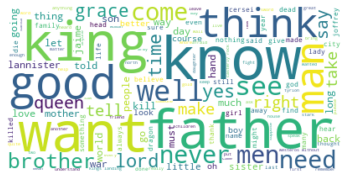

In [33]:
#Create wordcloud for top 3 houses
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Lannister)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

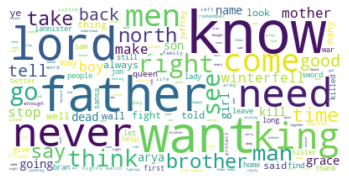

In [34]:
#Create wordcloud for top 3 houses
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Stark)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

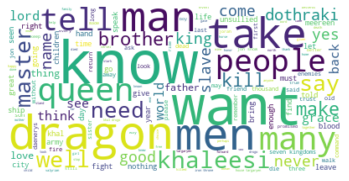

In [35]:
#Create wordcloud for top 3 houses
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Targaryen)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
Seaworth = ' '.join(house_words('Seaworth'))

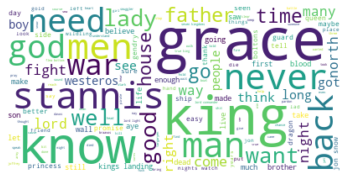

In [39]:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Seaworth)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()